In [1]:
import healpy as hp
from astropy.io import fits
import numpy as np
import treecorr
import sys, os
sys.path.append('/mnt/home/spandey/ceph/esutil/esutil')
# import esutil.coords
import coords
import matplotlib
%matplotlib inline
import matplotlib.pyplot as pl






In [2]:
# len(M200m_websky)
def ang2eq(theta, phi):
    ra = phi * 180. / np.pi
    dec = 90. - theta * 180. / np.pi
    return ra, dec


def eq2ang(ra, dec):
    phi = ra * np.pi / 180.
    theta = (np.pi / 2.) - dec * (np.pi / 180.)
    return theta, phi

def get_zmean(zcent,delz,nz_bin):
    prob_zcent = nz_bin
    zmean = (np.sum(prob_zcent*zcent*delz))/(np.sum(prob_zcent*delz))
    return zmean






In [3]:
ldir = '/mnt/home/spandey/ceph/agora/'
ksz_noiseless = hp.read_map(ldir + 'ksz/mdpl2_lkszNG_bahamas76_rot_sum_4_176_bnd_unb_1.0e+12_1.0e+18_v103021_lmax24000_nside8192_interp1.6_method1_1_lensed_map.fits')
ksz_noiseless = hp.ud_grade(ksz_noiseless, 2048)
ksz = ksz_noiseless
npix_ksz = len(ksz)
nside_ksz = hp.npix2nside(npix_ksz)
pix_theta, pix_phi = hp.pix2ang(nside_ksz, np.arange(npix_ksz))
pix_ra, pix_dec = ang2eq(pix_theta, pix_phi)






In [4]:
lgM_min = 14.0
lgM_max = 16.0

M_min = 10**lgM_min
M_max = 10**lgM_max

z_min = 0.5
z_max = 0.75



In [5]:
all_ind = np.arange(0,176)
# all_ind
zall, vall, mall, ra_all, dec_all = [], [], [], [], []
from tqdm import tqdm
for ji in tqdm(range(len(all_ind))):
    try:
        df = np.load(ldir + 'halolc/haloslc_rot_' + str(ji+1) + '.npy')
        if np.any(df[:,2] < z_min):
            pass
        elif np.any(df[:,2] > z_max):
            break
        else:
            m200c = df[:,3]
            indsel = np.where((m200c > M_min) & (m200c < M_max))[0]
            zsel = df[:,2][indsel]
            vsel = df[:,7][indsel]
            rasel = df[:,0][indsel]
            decsel = df[:,1][indsel]   
            msel = m200c[indsel]
            zall.append(zsel)
            vall.append(vsel)
            ra_all.append(rasel)
            dec_all.append(decsel)
            mall.append(msel)
    except:
        pass
zall = np.hstack((zall))
mall = np.hstack((mall))
vall = np.hstack((vall))

datapoint_ra, datapoint_dec = np.hstack((ra_all)), np.hstack((dec_all))



 41%|████      | 72/176 [00:30<00:43,  2.40it/s]


In [22]:
halo_theta, halo_phi = eq2ang(datapoint_ra, datapoint_dec)
haloradec_pix = hp.ang2pix(nside_ksz, halo_theta, halo_phi)



In [21]:
# datapoint_ra
# datapoint_dec

In [16]:
nrand = 5*len(datapoint_ra)
rand_ra, rand_dec = coords.randsphere(nrand, ra_range=[0,360], dec_range=[-90,90])
randradec_pix = hp.ang2pix(nside_ksz, rand_ra, rand_dec, lonlat=True)



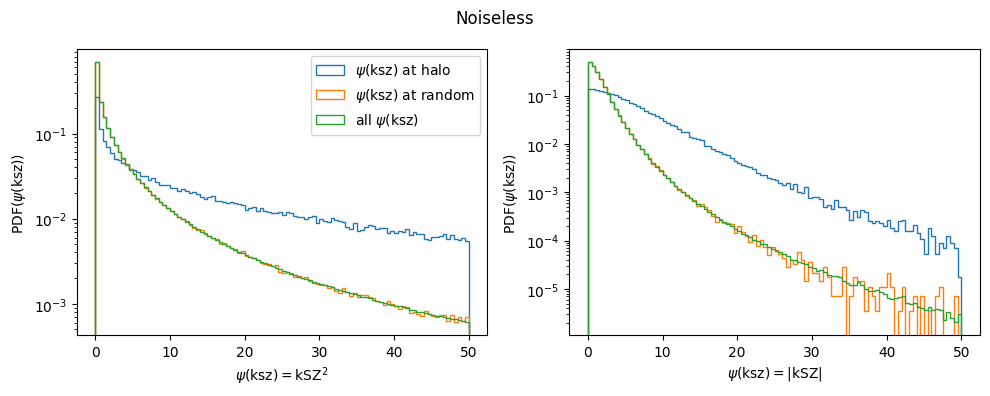

In [44]:
# ksz_field = ksz_noiseless**2
# kszf_at_halo = ksz_field[haloradec_pix]
# kszf_at_random = ksz_field[randradec_pix]
# pl.figure()
# _ = pl.hist(kszf_at_halo, bins=100, range=(0,50), histtype='step', density=True, label=r'$\psi({\rm ksz})$ at halo')
# _ = pl.hist(kszf_at_random, bins=100, range=(0,50), histtype='step', density=True, label=r'$\psi({\rm ksz})$ at random')
# _ = pl.hist(ksz_field, bins=100, range=(0,50), histtype='step', density=True, label=r'all $\psi({\rm ksz})$')
# pl.title(r'$\psi({\rm ksz}) = {\rm kSZ}^2$')
# pl.yscale('log')
# pl.legend()

# ksz_field = np.abs(ksz_noiseless)
# kszf_at_halo = ksz_field[haloradec_pix]
# kszf_at_random = ksz_field[randradec_pix]
# pl.figure()
# _ = pl.hist(kszf_at_halo, bins=100, range=(0,50), histtype='step', density=True, label=r'$\psi({\rm ksz})$ at halo')
# _ = pl.hist(kszf_at_random, bins=100, range=(0,50), histtype='step', density=True, label=r'$\psi({\rm ksz})$ at random')
# _ = pl.hist(ksz_field, bins=100, range=(0,50), histtype='step', density=True, label=r'all $\psi({\rm ksz})$')
# pl.title(r'$\psi({\rm ksz}) = |{\rm kSZ}|$')
# pl.yscale('log')
# pl.legend()

# make the above two plots as a two panel plot
pl.figure(figsize=(10,4))
pl.subplot(121)
ksz_field = ksz_noiseless**2
kszf_at_halo = ksz_field[haloradec_pix]
kszf_at_random = ksz_field[randradec_pix]
_ = pl.hist(kszf_at_halo, bins=100, range=(0,50), histtype='step', density=True, label=r'$\psi({\rm ksz})$ at halo')
_ = pl.hist(kszf_at_random, bins=100, range=(0,50), histtype='step', density=True, label=r'$\psi({\rm ksz})$ at random')
_ = pl.hist(ksz_field, bins=100, range=(0,50), histtype='step', density=True, label=r'all $\psi({\rm ksz})$')
pl.xlabel(r'$\psi({\rm ksz}) = {\rm kSZ}^2$')
pl.ylabel(r'${\rm PDF}(\psi({\rm ksz}))$')
pl.yscale('log')
pl.legend()
pl.subplot(122)
ksz_field = np.abs(ksz_noiseless)
kszf_at_halo = ksz_field[haloradec_pix]
kszf_at_random = ksz_field[randradec_pix]
_ = pl.hist(kszf_at_halo, bins=100, range=(0,50), histtype='step', density=True, label=r'$\psi({\rm ksz})$ at halo')
_ = pl.hist(kszf_at_random, bins=100, range=(0,50), histtype='step', density=True, label=r'$\psi({\rm ksz})$ at random')
_ = pl.hist(ksz_field, bins=100, range=(0,50), histtype='step', density=True, label=r'all $\psi({\rm ksz})$')
pl.xlabel(r'$\psi({\rm ksz}) = |{\rm kSZ}|$')
pl.ylabel(r'${\rm PDF}(\psi({\rm ksz}))$')
pl.yscale('log')
# pl.legend()
pl.suptitle('Noiseless')
pl.tight_layout()
pl.savefig('/mnt/home/spandey/ceph/SZST/results/HISTOGRAM_noiseless.png', bbox_inches='tight')


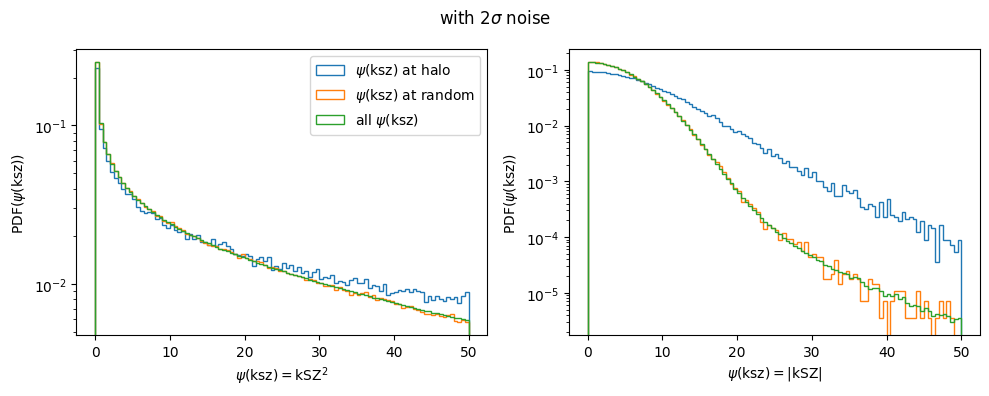

In [45]:
# make the above two plots as a two panel plot
pl.figure(figsize=(10,4))
pl.subplot(121)
noise_std_jz = 2
ksz_noise = np.random.randn(len(ksz_noiseless)) * (noise_std_jz*np.std(ksz_noiseless))
ksz = ksz_noiseless + ksz_noise
ksz_field = ksz**2
kszf_at_halo = ksz_field[haloradec_pix]
kszf_at_random = ksz_field[randradec_pix]
_ = pl.hist(kszf_at_halo, bins=100, range=(0,50), histtype='step', density=True, label=r'$\psi({\rm ksz})$ at halo')
_ = pl.hist(kszf_at_random, bins=100, range=(0,50), histtype='step', density=True, label=r'$\psi({\rm ksz})$ at random')
_ = pl.hist(ksz_field, bins=100, range=(0,50), histtype='step', density=True, label=r'all $\psi({\rm ksz})$')
pl.xlabel(r'$\psi({\rm ksz}) = {\rm kSZ}^2$')
pl.ylabel(r'${\rm PDF}(\psi({\rm ksz}))$')
pl.yscale('log')
pl.legend()
pl.subplot(122)
noise_std_jz = 2
ksz_noise = np.random.randn(len(ksz_noiseless)) * (noise_std_jz*np.std(ksz_noiseless))
ksz = ksz_noiseless + ksz_noise
ksz_field = np.abs(ksz)
kszf_at_halo = ksz_field[haloradec_pix]
kszf_at_random = ksz_field[randradec_pix]
_ = pl.hist(kszf_at_halo, bins=100, range=(0,50), histtype='step', density=True, label=r'$\psi({\rm ksz})$ at halo')
_ = pl.hist(kszf_at_random, bins=100, range=(0,50), histtype='step', density=True, label=r'$\psi({\rm ksz})$ at random')
_ = pl.hist(ksz_field, bins=100, range=(0,50), histtype='step', density=True, label=r'all $\psi({\rm ksz})$')
pl.xlabel(r'$\psi({\rm ksz}) = |{\rm kSZ}|$')
pl.ylabel(r'${\rm PDF}(\psi({\rm ksz}))$')
pl.yscale('log')
# pl.legend()
pl.suptitle(r'with $2\sigma$ noise')
pl.tight_layout()
pl.savefig('/mnt/home/spandey/ceph/SZST/results/HISTOGRAM_noise_2sig.png', bbox_inches='tight')


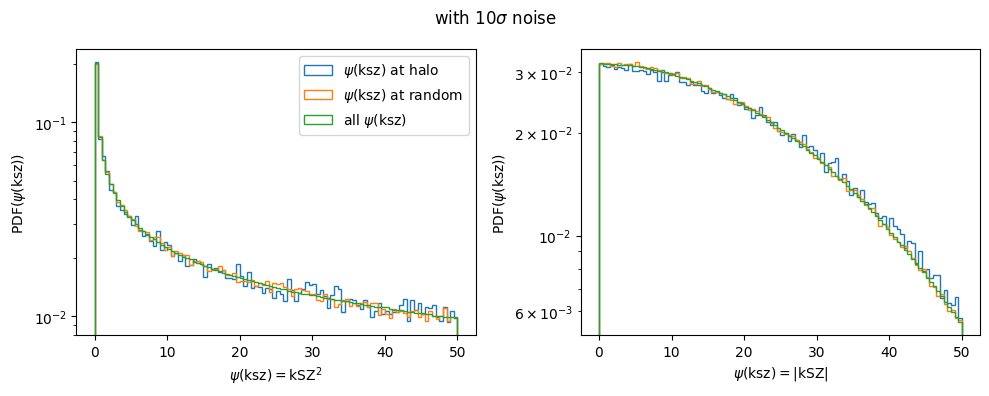

In [46]:
# make the above two plots as a two panel plot
pl.figure(figsize=(10,4))
pl.subplot(121)
noise_std_jz = 10
ksz_noise = np.random.randn(len(ksz_noiseless)) * (noise_std_jz*np.std(ksz_noiseless))
ksz = ksz_noiseless + ksz_noise
ksz_field = ksz**2
kszf_at_halo = ksz_field[haloradec_pix]
kszf_at_random = ksz_field[randradec_pix]
_ = pl.hist(kszf_at_halo, bins=100, range=(0,50), histtype='step', density=True, label=r'$\psi({\rm ksz})$ at halo')
_ = pl.hist(kszf_at_random, bins=100, range=(0,50), histtype='step', density=True, label=r'$\psi({\rm ksz})$ at random')
_ = pl.hist(ksz_field, bins=100, range=(0,50), histtype='step', density=True, label=r'all $\psi({\rm ksz})$')
pl.xlabel(r'$\psi({\rm ksz}) = {\rm kSZ}^2$')
pl.ylabel(r'${\rm PDF}(\psi({\rm ksz}))$')
pl.yscale('log')
pl.legend()
pl.subplot(122)
noise_std_jz = 10
ksz_noise = np.random.randn(len(ksz_noiseless)) * (noise_std_jz*np.std(ksz_noiseless))
ksz = ksz_noiseless + ksz_noise
ksz_field = np.abs(ksz)
kszf_at_halo = ksz_field[haloradec_pix]
kszf_at_random = ksz_field[randradec_pix]
_ = pl.hist(kszf_at_halo, bins=100, range=(0,50), histtype='step', density=True, label=r'$\psi({\rm ksz})$ at halo')
_ = pl.hist(kszf_at_random, bins=100, range=(0,50), histtype='step', density=True, label=r'$\psi({\rm ksz})$ at random')
_ = pl.hist(ksz_field, bins=100, range=(0,50), histtype='step', density=True, label=r'all $\psi({\rm ksz})$')
pl.xlabel(r'$\psi({\rm ksz}) = |{\rm kSZ}|$')
pl.ylabel(r'${\rm PDF}(\psi({\rm ksz}))$')
pl.yscale('log')
# pl.legend()
pl.suptitle(r'with $10\sigma$ noise')
pl.tight_layout()
pl.savefig('/mnt/home/spandey/ceph/SZST/results/HISTOGRAM_noise_10sig.png', bbox_inches='tight')


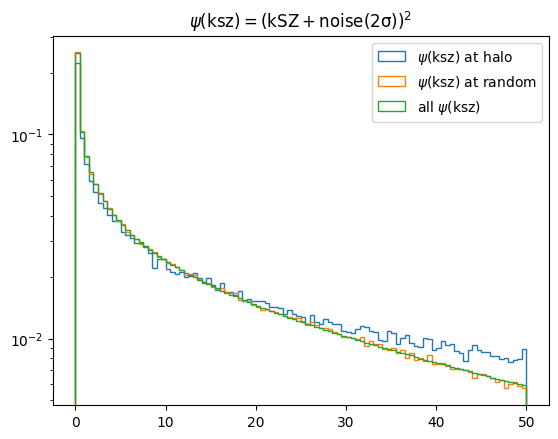

In [35]:
noise_std_jz = 2
ksz_noise = np.random.randn(len(ksz_noiseless)) * (noise_std_jz*np.std(ksz_noiseless))
ksz = ksz_noiseless + ksz_noise
ksz_field = ksz**2
kszf_at_halo = ksz_field[haloradec_pix]
kszf_at_random = ksz_field[randradec_pix]
pl.figure()
_ = pl.hist(kszf_at_halo, bins=100, range=(0,50), histtype='step', density=True, label=r'$\psi({\rm ksz})$ at halo')
_ = pl.hist(kszf_at_random, bins=100, range=(0,50), histtype='step', density=True, label=r'$\psi({\rm ksz})$ at random')
_ = pl.hist(ksz_field, bins=100, range=(0,50), histtype='step', density=True, label=r'all $\psi({\rm ksz})$')
pl.title(r'$\psi({\rm ksz}) = ({\rm kSZ + noise(2\sigma)})^2$')
pl.yscale('log')
pl.legend()




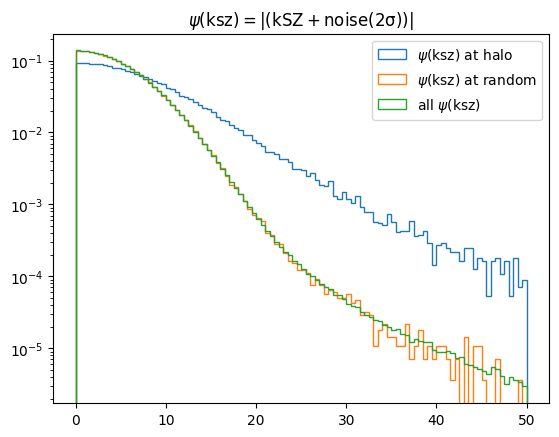

In [36]:
noise_std_jz = 2
ksz_noise = np.random.randn(len(ksz_noiseless)) * (noise_std_jz*np.std(ksz_noiseless))
ksz = ksz_noiseless + ksz_noise
ksz_field = np.abs(ksz)
kszf_at_halo = ksz_field[haloradec_pix]
kszf_at_random = ksz_field[randradec_pix]
pl.figure()
_ = pl.hist(kszf_at_halo, bins=100, range=(0,50), histtype='step', density=True, label=r'$\psi({\rm ksz})$ at halo')
_ = pl.hist(kszf_at_random, bins=100, range=(0,50), histtype='step', density=True, label=r'$\psi({\rm ksz})$ at random')
_ = pl.hist(ksz_field, bins=100, range=(0,50), histtype='step', density=True, label=r'all $\psi({\rm ksz})$')
pl.title(r'$\psi({\rm ksz}) = |({\rm kSZ + noise(2\sigma)})|$')
pl.yscale('log')
pl.legend()




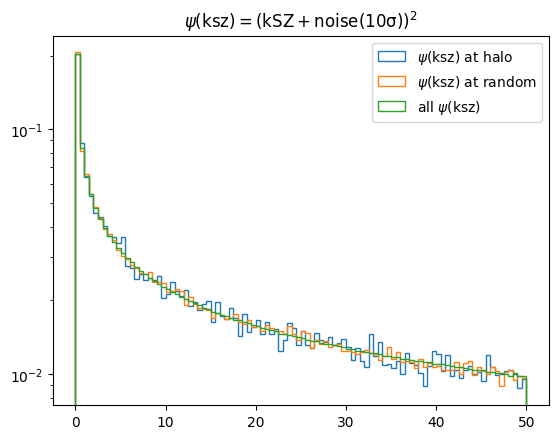

In [37]:
noise_std_jz = 10
ksz_noise = np.random.randn(len(ksz_noiseless)) * (noise_std_jz*np.std(ksz_noiseless))
ksz = ksz_noiseless + ksz_noise
ksz_field = ksz**2
kszf_at_halo = ksz_field[haloradec_pix]
kszf_at_random = ksz_field[randradec_pix]
pl.figure()
_ = pl.hist(kszf_at_halo, bins=100, range=(0,50), histtype='step', density=True, label=r'$\psi({\rm ksz})$ at halo')
_ = pl.hist(kszf_at_random, bins=100, range=(0,50), histtype='step', density=True, label=r'$\psi({\rm ksz})$ at random')
_ = pl.hist(ksz_field, bins=100, range=(0,50), histtype='step', density=True, label=r'all $\psi({\rm ksz})$')
pl.title(r'$\psi({\rm ksz}) = ({\rm kSZ + noise(10\sigma)})^2$')
pl.yscale('log')
pl.legend()




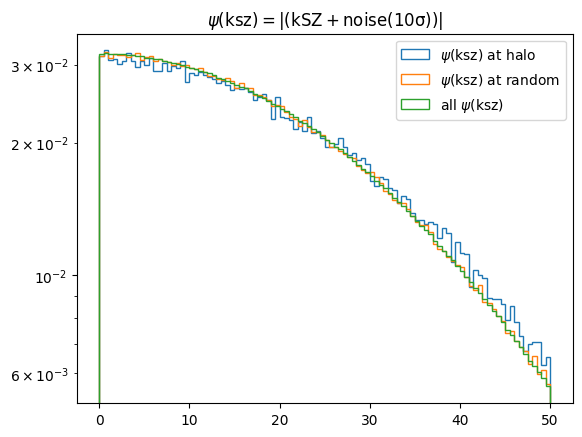

In [38]:
noise_std_jz = 10
ksz_noise = np.random.randn(len(ksz_noiseless)) * (noise_std_jz*np.std(ksz_noiseless))
ksz = ksz_noiseless + ksz_noise
ksz_field = np.abs(ksz)
kszf_at_halo = ksz_field[haloradec_pix]
kszf_at_random = ksz_field[randradec_pix]
pl.figure()
_ = pl.hist(kszf_at_halo, bins=100, range=(0,50), histtype='step', density=True, label=r'$\psi({\rm ksz})$ at halo')
_ = pl.hist(kszf_at_random, bins=100, range=(0,50), histtype='step', density=True, label=r'$\psi({\rm ksz})$ at random')
_ = pl.hist(ksz_field, bins=100, range=(0,50), histtype='step', density=True, label=r'all $\psi({\rm ksz})$')
pl.title(r'$\psi({\rm ksz}) = |({\rm kSZ + noise(10\sigma)})|$')
pl.yscale('log')
pl.legend()


